In [1]:
from scipy.stats import binom
from scipy.special import comb
from scipy.optimize import bisect
from math import factorial
from sympy.functions.combinatorial.numbers import stirling

import requests
from bs4 import BeautifulSoup
from IPython.display import Markdown, display,IFrame,HTML,Image

In [2]:
url='https://www.janestreet.com/puzzles/robot-updated-swimming-trials-index/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Puzzle as published\n'+url))
HTML(str(soup.find('div', {'class' :'inner-wrapper'})))

### Puzzle as published
https://www.janestreet.com/puzzles/robot-updated-swimming-trials-index/

In [3]:
# probability for m balls in n boxes exactly k empty
def empty(n,m,k):
    r=n-k
    return (factorial(r)*stirling(m,r)*comb(n,r))/n**m

In [4]:
# What I thought was the right answer
def wrong(p):
    n=0
    for x in range(1,24):
        n+=sum([min(1,k/x)*empty(8,24-x,k)*binom.pmf(x,24,p) for k in range(9)])
    return n/(1-binom.pmf(0,24,p))-1/3

print("Answer is {:.6f}".format(1-bisect(wrong,0.000001,1)))

Answer is 0.999123


In [5]:
# What the right answer was

def game(p):
    n=0
    for x in range(24):
        n+=sum([min(1,k/(24-x))*empty(8,x,k)*binom.pmf(x,23,p) for k in range(9)])
    return n-1/3

print("Answer is {:.6f}".format(bisect(game,0.000001,1)))

Answer is 0.999560


### Solution as published
https://www.janestreet.com/puzzles/robot-updated-swimming-trials-solution/

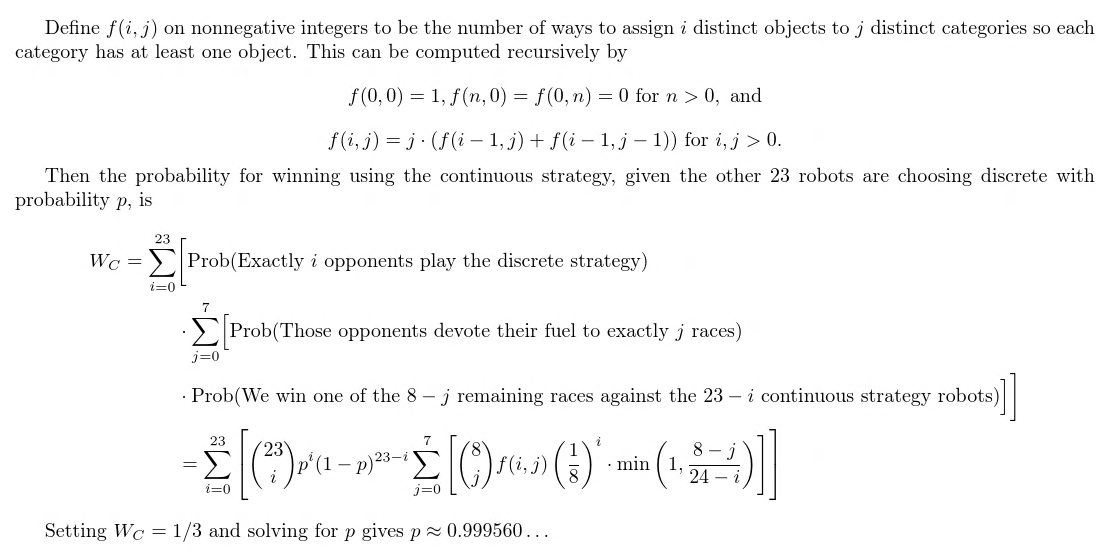

In [7]:
url='https://www.janestreet.com/puzzles/robot-updated-swimming-trials-solution/'
res = requests.get(url)
soup = BeautifulSoup(res.content, 'html.parser')
display(Markdown('### Solution as published\n'+url))
display(Image("https://www.janestreet.com/puzzles/robot_updated_swimming_trials_solution.png",width=800))

HTML(str(soup.find_all('div', {'class' :'inner-wrapper'})[1]))